In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


1. 데이터 확인 - 비어있는값 확인
2. Column 분석 - 상관관계, 개별분석 .describe()
3. Feature Engineer - class나누기, 구간 나누기, 텍스트 데이터 처리 등
4. 머신러닝 활용하여 모델 만들기
5. 모델 학습 및 예측
6. 모델 평가 - 성능평가 


In [2]:
import missingno as msno

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')

# **1. 데이터 확인**

In [4]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


**1.1 NaN 값 확인**

80% 정도면 모델 학습에 포함시키지 않는다.

In [6]:
for col in df_train.columns: 
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format (
        col, 
        100*(df_train[col].isnull().sum()/df_train[col].shape[0])
    )
    # printf("column: %10s\t Percent of NaN value: %.2f%%\n", col, percent); C언어 처럼 메세지 포맷하는법.
    # .isnull 빈값을 True/False 로 반환 => .sum(): True를 1로 계산하여 빈값을 구한다.
    # df.shape[0] 전체 행의 개수. df.shape[1] 전체 열의 개수. df.shape -> (행 개수, 열 개수)
    print(msg);

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [7]:
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(
        col, 
        100*(df_test[col].isnull().sum()/df_test[col].shape[0])
    )
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


Mano 라이브러리: 빈값찾기에 유용함 

<Axes: >

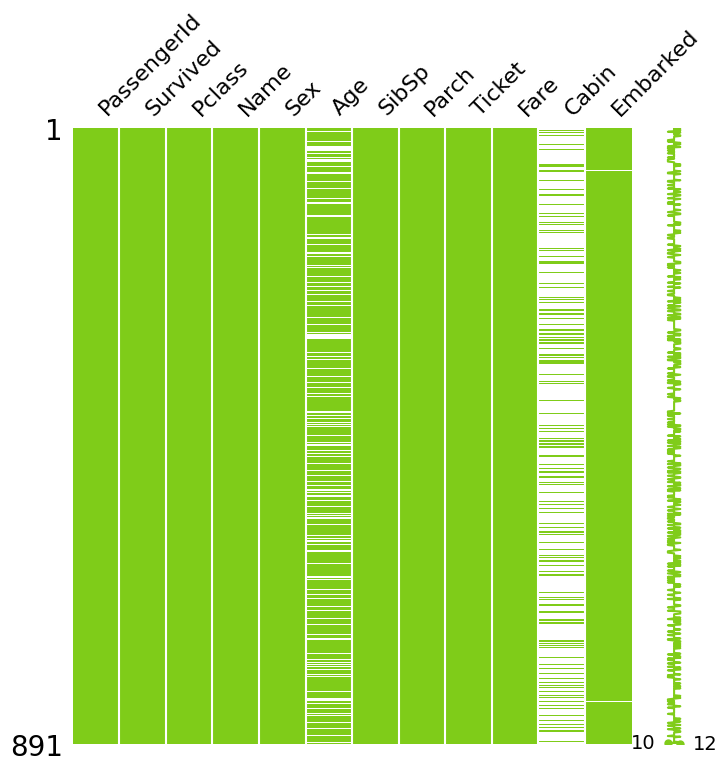

In [8]:
msno.matrix(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.5, 0.8, 0.1))

<Axes: >

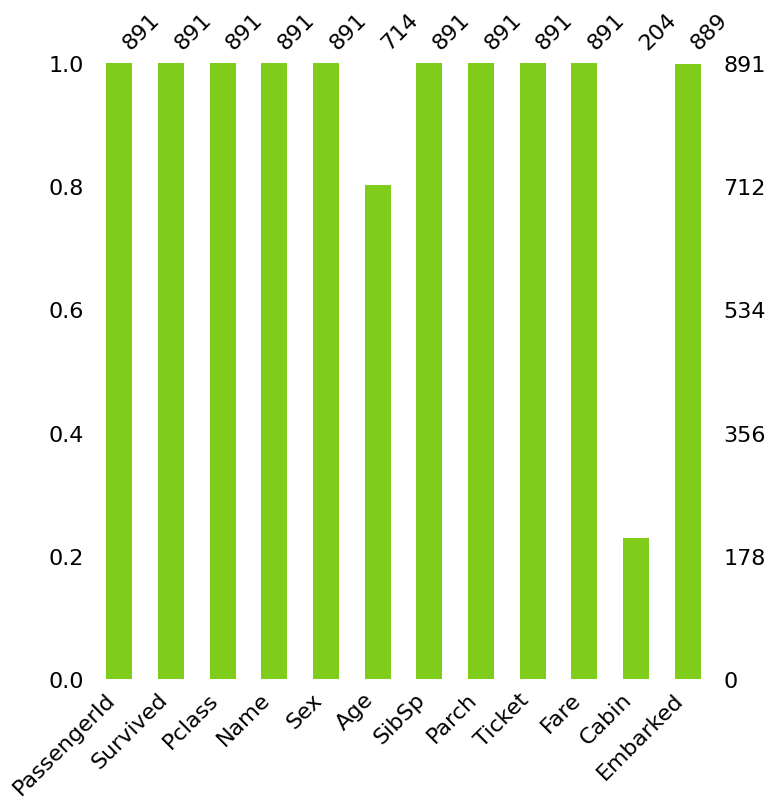

In [9]:
msno.bar(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.5, 0.8, 0.1))

<Axes: >

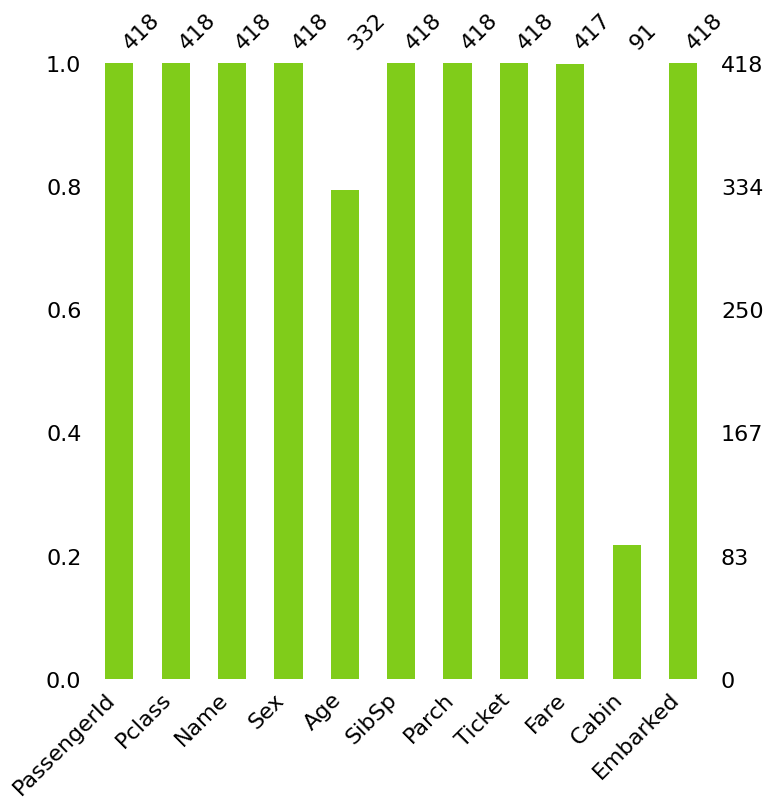

In [10]:
msno.bar(df=df_test.iloc[:, :], figsize=(8, 8), color=(0.5, 0.8, 0.1))

Text(0.5, 1.0, 'Count plot - Survived')

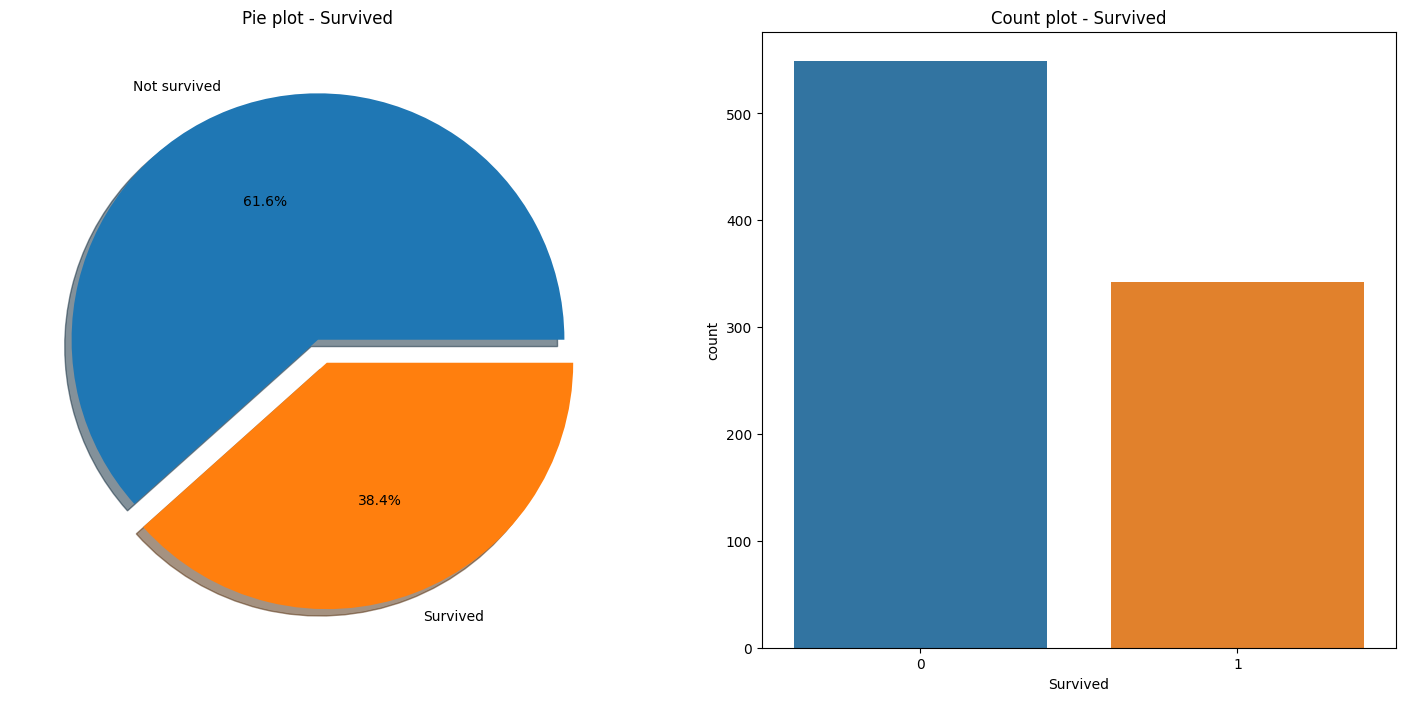

In [11]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
# f: 전체 figure, ax: ax[0], ax[1] 각각 그래프 
# .subplots(1,2) : 1행 2열 2개의 그래프 

df_train['Survived'].value_counts().plot.pie(
    labels = ['Not survived', 'Survived'],
    explode=[0, 0.1],
    autopct='%1.1f%%',
    ax=ax[0],
    shadow=True
)

ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('') # y축 제목 없음으로

sns.countplot(x='Survived', data=df_train, ax=ax[1])
# x='column name' -> the column name should be same as x='column name'
ax[1].set_title('Count plot - Survived')

# 2. 데이터 분석

In [12]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()
# Pclass와 Survived 열만 포함한 DF를 Pclass 기준으로 그룹(groupby)한뒤, Pclass를 인덱스가 되도록한다.
# count는 0,1 생존 여부 상관없이 모두 센다

,Survived
Pclass,
1,216
2,184
3,491


In [13]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()
# sum 은 0,1 더한 값이기 때문에 생존자의 수를 알수있다

,Survived
Pclass,
1,136
2,87
3,119


In [14]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<Axes: xlabel='Pclass'>

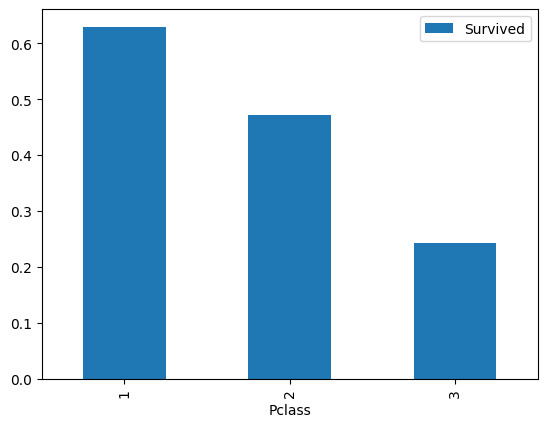

In [15]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()
# 여기 mean 을 하면 생존율이 나오는 이유는 생존한사람 수(1+0+0+0+1)/모든 사람의 수(N) 이기때문에

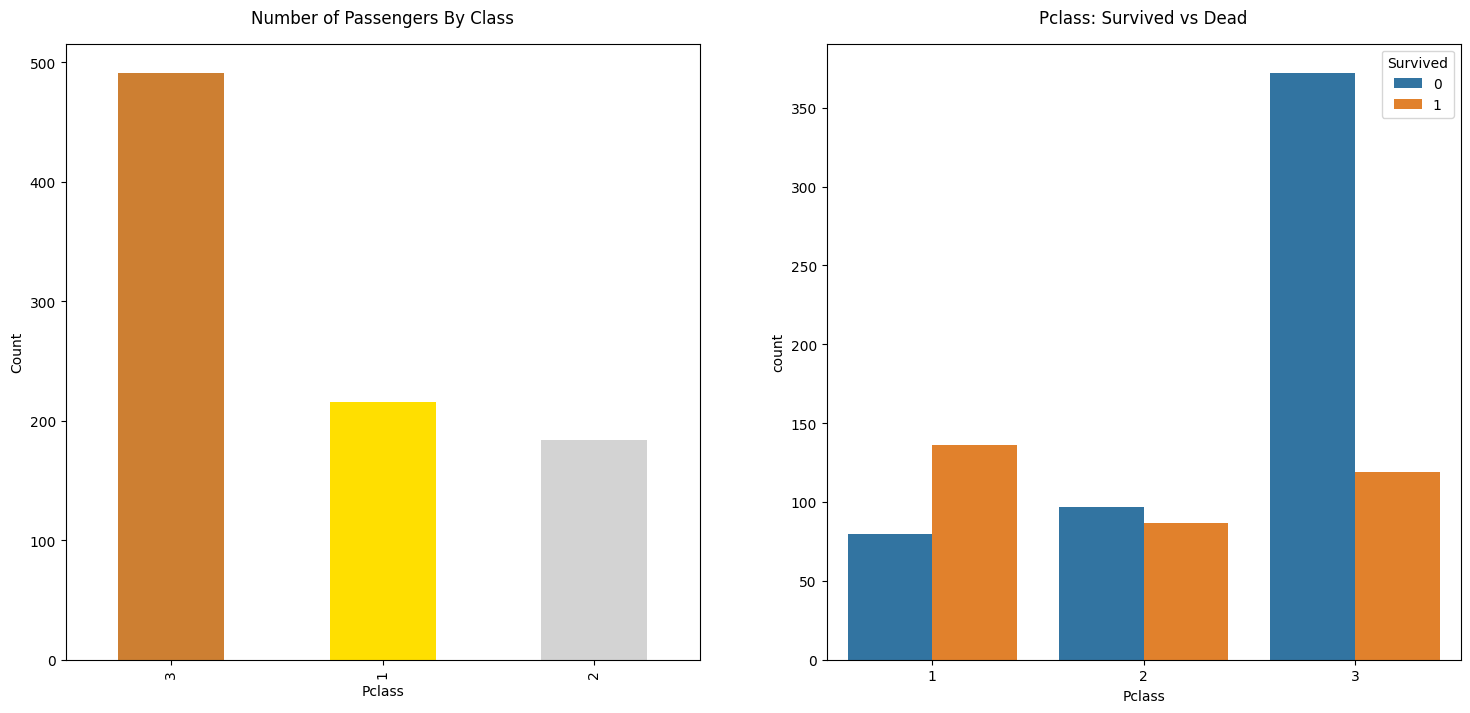

In [16]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18, 8))
# f - Figure
df_train['Pclass'].value_counts().plot.bar(
    color=['#CD7F32','#FFDF00','#D3D3D3'], 
    ax=ax[0]
)
ax[0].set_title('Number of Passengers By Class', y=y_position)
ax[0].set_ylabel('Count')

sns.countplot(x='Pclass', hue='Survived', data=df_train, ax=ax[1])
# x='Pclass': 좌석 등급을 x축에
# hue='Survived': 생존 여부로 색을 나눔 (0=사망, 1=생존)
# countplot은 자동으로 각각의 개수를 세어줌
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()


Text(0.5, 1.0, 'Sex: Survived vs Dead')

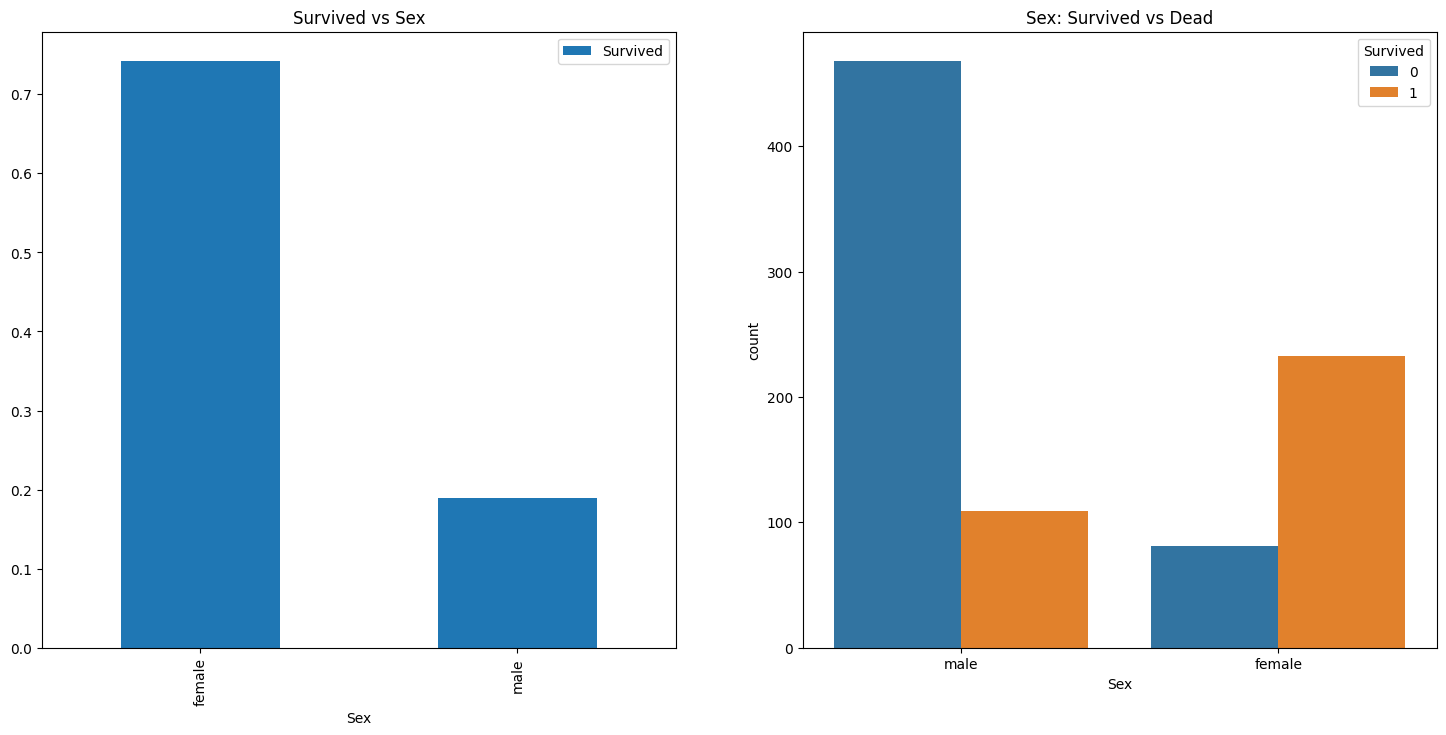

In [17]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot(x='Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')

In [18]:
df_train[['Sex', 'Survived']].groupby(
    ['Sex'], as_index=False
).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [19]:
pd.crosstab(
    df_train['Sex'], 
    df_train['Survived'],
    margins=True
).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


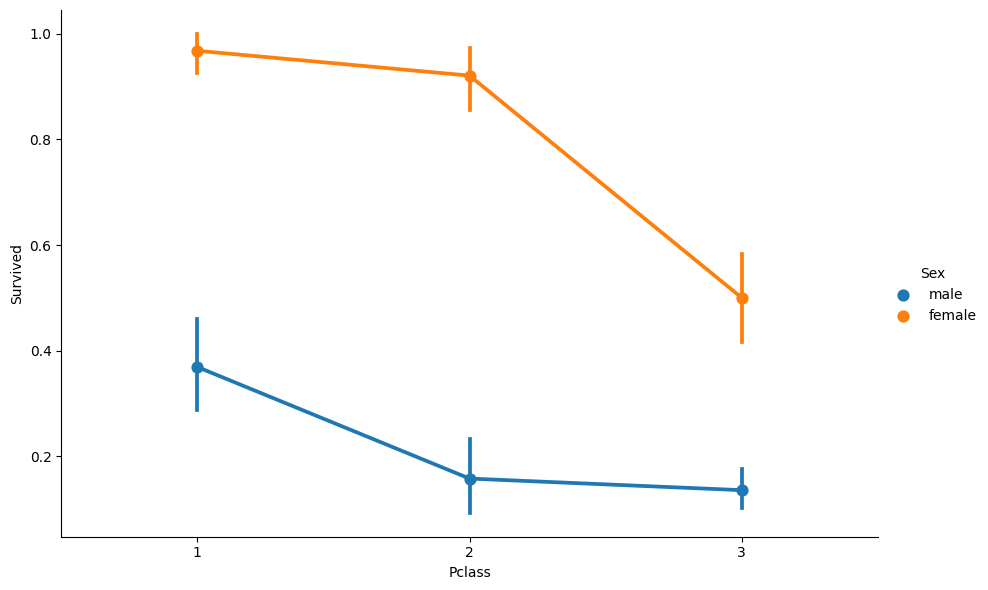

In [20]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=df_train, kind='point', height=6, aspect=1.5)
# CATegorical data PLOT

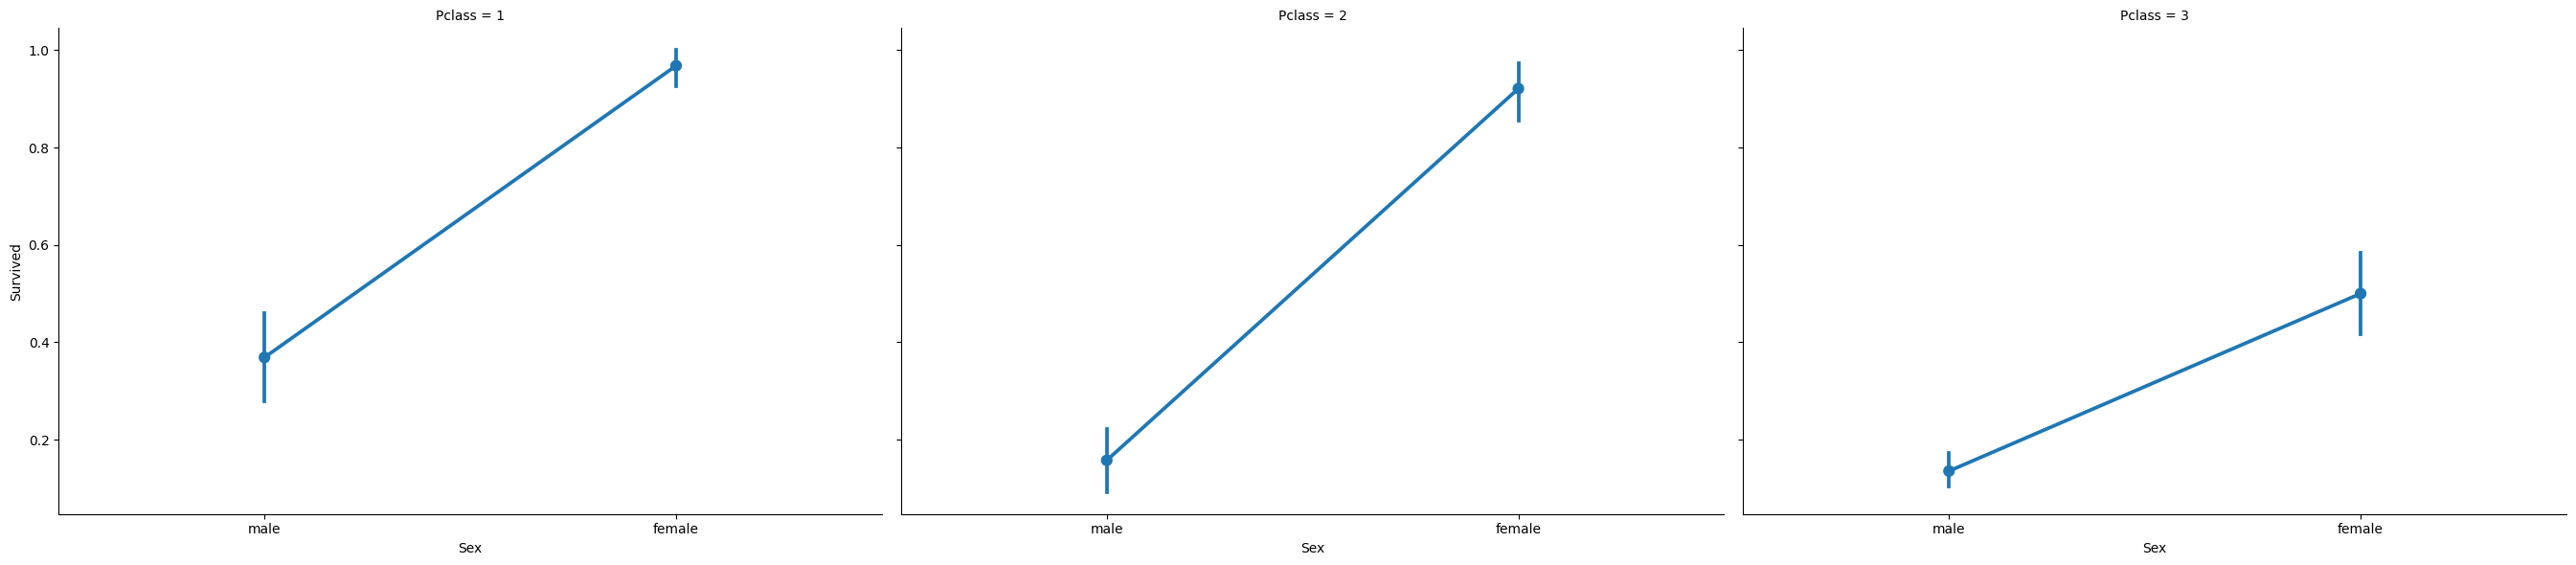

In [23]:
sns.catplot(x='Sex', y='Survived', col='Pclass', data=df_train, kind='point', height=6, aspect=1.5)

In [24]:
print('Oldest Passenger: {:.1f} Years'.format(df_train['Age'].max()))
print('Younged Passenger: {:.1f} Years'.format(df_train['Age'].min()))
print('Average Passenger: {:.1f} Years'.format(df_train['Age'].mean()))

Oldest Passenger: 80.0 Years
Younged Passenger: 0.4 Years
Average Passenger: 29.7 Years


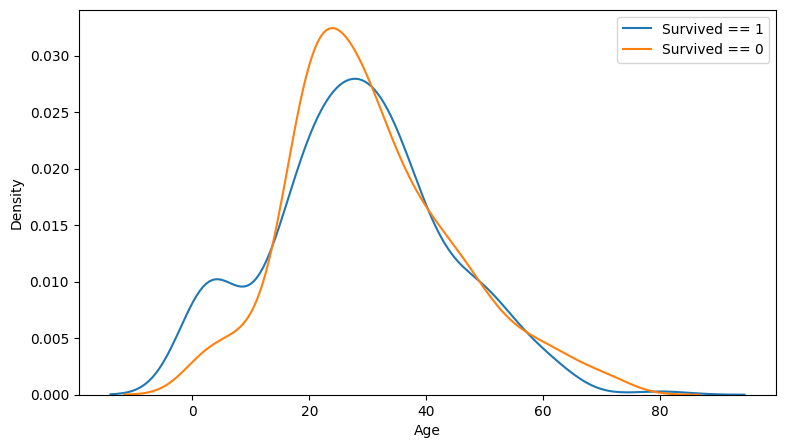

In [26]:
f, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
# True인 행을 골라낸뒤에, 그행의 Age를 반환한다. 
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()
#Kernel Density Estimation 그래프를 곡선화로 보여준다.

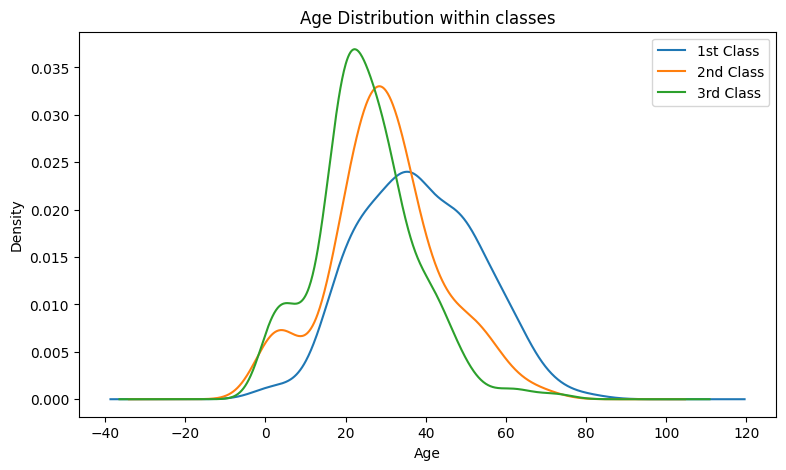

In [28]:
f, ax = plt.subplots(1, 1, figsize=(9,5))
#sns.kdeplot(df_train[df_train['Pclass']==1]['Age'], ax=ax) -> Pandas lib, 
#df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde') -> Seaborn lib
df_train.loc[df_train['Pclass']==1, 'Age'].plot(kind='kde')
# 데이터 필터링하고 선택할때 다음과같은 함수를 쓰는것이 안전하다. 
# 위의 df['Age'][조건] or df[조건]['Age'] 방식은 비추천
#loc : location by label
#iloc: integer location
df_train.loc[df_train['Pclass']==2, 'Age'].plot(kind='kde')
df_train.loc[df_train['Pclass']==3, 'Age'].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])